# Physics 77, Lecture 2: Basics, Functions, Loops, Lists and Array

## Outline
- Recap
- Basics
- Composite Types (Lists, tuples, arrays)
- Functions
- Loops


# Recap

- Introductory slides: course outline, syllabus, policy
- Introduction to Unix, including use of the command link
- A graphing teaser
- Introduction to computing, programming and python

# Announcements
- Apologies to contradict what I said in last week's lecture, but we have decided to adjust the schedule for the HW due date. The reason is so that you have time to absorb the material in the workshop. The schedule will be as follows (from HW2 onwards): homework will be due at 2 pm on Fridays; workshops will be due at 4 pm on Mondays. This means that WS2 will be due on 2/10 and HW2 on 2/14. 
- Thanks to everyone for filling in the survey on last week's lecture (please do fill it in if you have any questions). 

Some questions based on survey responses:
- Could you please recommend some websites for us to learn python? Please have a look at the bottom of the syllabus page for some linkes
- Some people reported issues with jupyter on their laptops for the lecture. After the workshop is anyone having issues with this.
- What is the difference between tables and charts? It depends a bit on how people use the words, but generally a table contains numbers, while a chart would be a visual display of data. Most of the time, I'll use the word plot in the course.
- The use of numpy and what jupyter really is: Numpy is a python library, i.e. a sets of functions (we'll hear about those today) that are very useful for numerical programming. Jupyter is an interface to programming python (developed initially at Berkeley) that can be very convenient for development.
- Has anyone not yet accessed slack? If so, please send me an email. Reminder: slack is the preferred channel for course communication and, in particular, asking questions about the course content or the workshops or the problem sets.
- My office hours this week will be on Thursday at 11:30 am in 425 LeConte or on zoom. Has anyone tried connecting to zoom yet?

## Basics

Let's recall some topics from Newman Chapter 1

In [13]:
2+2 # addition

4

In [14]:
10*2 # multiplication

20

In [15]:
3%2  # modulus

1

In [19]:
7.//2  # floor division

3.0

In [17]:
10**2 # exponent, c.f. multiplication above

100

### Assignments and variables

A "variable" is a handle to the data that you can name and manipulate. 
A very common concept in programming ! Actual implementation and properties depend on the language. In Python, there are 3 basic variable types: 
* floats (real numbers),
* ints (discrete integers), and 
* strings (sequences of characters)

In [28]:
#candiate for deletion
import math as m

a = 1
b = +55
c = 20

x1 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a)
print (x1)

x2 = (-b - m.sqrt(b*b - 4*a*c))/(2*a)
print(x2)

-0.3660728975697296
-54.63392710243027


In [26]:
x = 27.
print(type(x))


<class 'float'>


In [27]:
y = 5/2
print(y)
print(type(y))

2.5
<class 'float'>


In [29]:
str = 'Hello world'
print(type(str))

<class 'str'>


In [30]:
str = "Hello world"
print(str)

Hello world


### Shorthands

In [32]:
x = 5
print(x)
x = x + 6
print(x)
x+=6
print(x)

5
11
17


In [34]:
y = 100.
print(y)
y /= 10.
print(y)

100.0
10.0


In [35]:
i = 100
print(i)
i -= 10
print(i)

100
90


In [38]:
i = 1
print(i)
i++
print(i)

SyntaxError: invalid syntax (<ipython-input-38-d547ecade7dc>, line 3)

### Association rules, order of operations

In [6]:
(2+2)*2

8

In [7]:
(2+2)*2-1/2

7.5

### Comments

In [ ]:
# this is a comment

In [ ]:
x = 5 # assign 5 to a variable named "x"

'''

more comments

even more text

I am very verbose

x=7

'''

print(x)

### Number of bytes and precision of data types

In [44]:
from decimal import Decimal
import sys

Let's determine the sizes of basic types

In [ ]:
sys.getsizeof(int)  # huh ?

In [ ]:
sys.getsizeof(int(2)) # more realistic. 8 bytes for the data, 16 bytes of overhead

In [ ]:
sys.maxsize    # this is a 64-bit integer, because I am running a 64-bit version of Python

In [ ]:
2**63-1  # check

Interesting thing about Python is that it would allocate more bytes for data if needed, so there is no practical limit to the integer value

In [ ]:
2**65-1 

In [ ]:
print(sys.getsizeof(2**65))
print(sys.int_info)

Floating point numbers:

In [ ]:
sys.getsizeof(float(1.0))   # apparently, also 16 bytes

Largest representable float

In [42]:
1.7e+308

1.7e+308

In [41]:
5+7/180.+1.8e308/1.8e+308

nan

Smallest representable float

In [39]:
5e-324

5e-324

In [40]:
2e-324

0.0

#### Sizes of compusite data types (tuples, lists, arrays)

In [45]:
l = [1,2,4,5,6]
sys.getsizeof(l)

104

In [46]:
t = (1,2,4,5,6)
sys.getsizeof(t)

88

In [ ]:
N=100000
a = np.zeros(N,dtype=np.int8)
#print(a)
print('size of a {0:d}-element array is {1:d} bytes, {2:3.1f} bytes/element'.format(N,sys.getsizeof(a),sys.getsizeof(a)/N))

#### Beware of floating point comparisons !

In [ ]:
1 == 1

In [ ]:
1.1 == 11.0000000000000000001/10.

In [ ]:
import numpy as np

In [ ]:
np.pi

In [ ]:
np.pi == 3.141592653589793238462643383279502884197169399

In [ ]:
3.14159265358979 == 3.141592653589793

In general, the precision of the arithmetic comparisons (==) is not guaranteed. Behavior in Python may be very different from other languages, may depend on OS, compilers, etc. It is considered bad practice to use == comparisons on floating point data. Preferably, you should check if the difference between the two numbers is within a certain precision:

In [ ]:
x = 3.1415926
abs(x-np.pi)<1e-6

### Formatted output

Usually the data you manipulate has finite precision. You do not know it absolutely precisely, and therefore you should not report it with an arbitrary number of digits. One of the cardinal rules of a good science paper: round off all your numbers to the precision you know them (or care about) -- and no more ! 

#### Examples:

In [ ]:
x = 20.0 # I only know 3 digits
print(x)   # OK, let Python handle it

That's actually pretty good -- Python remembered stored precision !
What happens if you now use x in a calculation ? 

In [ ]:
print(np.sqrt(x))

Do we really know the output to 10 significant digits ? No ! So let's truncate it

In [ ]:
print('sqrt(x) = {0:6.3f}'.format(-np.sqrt(x)))

Another (deprecated) way to skin this cat:

In [ ]:
print('sqrt(x) = %5.2f' % np.sqrt(x))
print('sqrt(y) = %5.2f' % np.sqrt(101))

Print two numbers:

In [ ]:
print ('sqrt(x) = {0:3.2e}, x**2 = {1:4.2f}'.format(np.sqrt(x),x**2))
print ('sqrt(x) = %3.2e, x**2 = %4.2f' % (np.sqrt(x), x**2))

For more formatting options, see https://pyformat.info/

### Complex numbers
Complex numbers and arithmetic are built into Python (very convenient). Mathematical functions are also provided for manipulating complex numbers. Math package defines real functions, cmath defines complex functions, scipy overloads them to return real values if the result of a calculation is a real number, complex otherwise 

In [ ]:
import math as m
import cmath as cm

print (cm.sqrt(-10))

In [ ]:
#from math import *
from cmath import *
#from scipy import *
z = 1 + 1j   # create a complex number
print(sqrt(z))

print(sqrt(-1))

In [ ]:
print (z.real, z.imag, abs(z))

In [ ]:
print (z*(1-1j))

In [ ]:
print (sqrt(4), sqrt(z), exp(z))

### Composite data types: lists, tuples, arrays

Any computing language defines more complex data structures, which aggregate individual data into a single container. There are two built in structures to python called tuples an list. However, for our purposes, the most useful data structure is an array, which holds a fixed number of elements of a single type, usually in a contiguous region in memory. 
Individual array elements can be indexed; first index in Python and other C-like languages is 0


In [48]:
import numpy as np
a = np.array([1,2,3,4,5])
print (a[0],a[4])

1 5


In [49]:
a[5]=10

IndexError: index 5 is out of bounds for axis 0 with size 5

In [50]:
print (a[-1], a[-3])   # beware, very different in other languages !

5 3


In [51]:
print(len(a))   # how long is an array ? 

5


In [55]:
print(a)
# append element to an array. Beware !- leaves original array intact, and returns a new array
b = np.append(a,10)
print(a)
print(b)

[ 1  2  3  4  5 10]
[ 1  2  3  4  5 10]


In [ ]:
a = np.append(a,[6,7,8,9,10]) # if you want to change the original array
print (a)

Arrays can be multi-dimentional

In [58]:
m = np.ndarray(shape=(3,3),dtype=float)  # unitialized array
print (m)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [59]:
m[0,:]=[1,2,3]
m[1,:]=[4,5,6]
m[2,:]=[7,8,9]
print (m)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [60]:
print (m[0,1]) # C-style, row-wise

2.0


In [62]:
v = np.array([1,2,3])
print (m*v,"\n")            # probably not what you expected ?
print (np.matmul(m,v),"\n") # this is how we do linear algebra !
print (m*5)

[[ 1.  4.  9.]
 [ 4. 10. 18.]
 [ 7. 16. 27.]] 

[14. 32. 50.] 

[[ 5. 10. 15.]
 [20. 25. 30.]
 [35. 40. 45.]]


In [63]:
print (np.linalg.det(m))  # determinant -- remeber do not compare directly to zero !

-9.51619735392994e-16


In [64]:
abs(np.linalg.det(m)-1e-6)>0  # is matrix invertible ? 

True

Lists are a bit more flexible than an array, but does not need to consist of elements of a single type. This can be convenient, but I generally consider this a risk. So if I were you, I would keep elements of a single type in a list. You can convert lists into Numpy arrays then. 

In [ ]:
mylist = [1,2,3,4,'foo','bar',5.8]
print(mylist)

In [ ]:
print (len(mylist))

In [65]:
l = [1,2,3]
l.append([6,7]) # should append individual elements 6 and 7, right ?
print (l)           # woah, what happened ?
print (len(l))

[1, 2, 3, [6, 7]]
4


In [ ]:
l.extend([8,9,10,11])    # this is what we really meant
print (l)

In [ ]:
len(l)

Differences between tuples and lists: tuples are not mutable !

In [66]:
t = (1,2,3)
print(t)
t.append(5)

(1, 2, 3)


AttributeError: 'tuple' object has no attribute 'append'

A more powerful structure is a dictionary (map, or hash table, or RB tree in some languages)

In [67]:
age = {'Smith': 'Apple', 'Smith': 17}   # declare a dictionary with 2 elements. Types can be mixed
print (age['Smith'])
age['Smith'] = 45
print (age['Smith'])
age['Jones, Bill'] = 5
age['Baker, Street'] = 105
#print (age['Jones'])
print (age['Jones, Bill'])
#print (age['Ivanov'])

income = {'Jones': 1}
print (income['Jones'])

17
45
5
1


## Functions

A function is a self-contained named piece of code that can be used by other parts of the code. Functions usually take arguments (parameters, variables), and return a value. Trig functions are a standard example. Most languages allow you to define your own functions. Functions can be group into a library, usually according to functionality they provide (e.g. math, complex numbers, linear algebra, plotting, etc).

In a way, Python functions can be viewed mathematical functions:

$f: \mathbb{X} \rightarrow \mathbb{Y}$

where $\mathbb{X}$ and $\mathbb{Y}$ can be whichever space of your choice.

Python has 3 classes of functions:
-  built-in functions, e.g. print()
-  functions from packages/modules, e.g. sin() from the math package
-  user-defined functions.

**Example 1: absolute value**

$\text{abs}: \mathbb{R} \rightarrow \mathbb{R}^+_0$

Mathematical implementation:

$x = \sqrt{x^2}$

In [68]:
x = -3
r = abs(x)   # Call the abs() function 
print(r)     # Call the print() function!

3


**Example 2: type casting**

In python one can convert variables from one type to the other using dedicated predefined functions. One example is the <font color=blue>float</font> function:

In [69]:
a = 1.
b = float(a) # casting a float to a float. Actually quite useless
c = 2
d = float(c) # casting an integer to a float
e = "4."
f = float(e) # casting a string to a float
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

1.0
1.0
2
2.0
4.
4.0


### User defined functions

If the function we need doesn't exist, we can create one. In order to do so, we need to provide:
-  a list of arguments
-  the algorithm of the function
-  the return value

The basic structure of a function is the following:

In [70]:
def MyFunction( x ):
    y = x*x            
    return y

print( MyFunction(3) ) 

9


In [71]:
y = MyFunction(173)
print(y)
print(173**2)

29929
29929


Notice:
-  the colon at the end of the function declaration
-  the indentation
-  the <font color=blue>return</font> command at the end of the function body

**Example: $\sin{(x)}/x$**

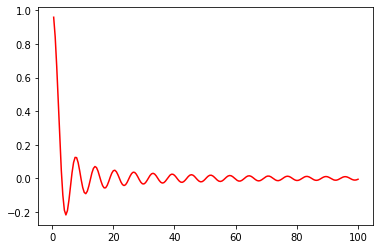

In [72]:
import matplotlib.pyplot as plt # we need this for drawing
import numpy as np              # for the sin and linspace function

def SinXoverX( x ):  # declaration
    y = np.sin(x)/x  # implementation
    return y         # return

x = np.linspace( 0.5, 100., 200 ) # generate 200 points evenly distributed between 0.5 and 100.
y = SinXoverX(x)
# if a plot function doesn't show anything, run this and then the plot function again
%matplotlib inline
plt.plot( x, y, 'r-' )

**Example: function with multiple arguments**

In [73]:
def distance( x, y ):
    return abs(x-y) # It's a very simple calculation, so I can implement it directly in the return statement

print( distance( 2., 4. ) )

2.0


**Required and optional arguments**

Python functions can have two types of arguments: required and optional. Required arguments have no default value and must be passed by the user. Optional arguments have a default value which is used if not specified by the user.
For example, let's rewrite the <font color=blue>distance</font> function with the second argument as optional:

In [ ]:
def distance( x, y=0. ):
    return abs(x-y)

print( distance( 2., 4. ) )
print( distance( 1. ) )

**Function features to keep in mind**

-  Python allows also functions with no return value. Why? Sometimes a function is used to do things. e.g. if you want to compute the same quantity many times, and print it.
-  Functions can only be used after they are defined. It is good practice to define them at the beginning of a script.
-  You can put the function definitions in a separate file and import it. This is useful if you have some generic function that you use in many different programs.

## Conditionals

Conditionals are commands that are executed only if some condition is satisfied.
Beware! Indentation is important in Python. Note, that it doesn't really matter how broad the indentation is.


**Example: Heaviside step function**

All the functions we considered so far were well behaved. But how do we code a step function in Python?

$y = f(x) =
\begin{cases}
0 \quad \text{if}\quad x<0 \\
1 \quad \text{if}\quad x\geq0
\end{cases}
$

In [75]:
def Theta( x ):
    if x < 0.:
        return 0.
    return 1.

xraw = input('Enter numerical value: ') # Ask the user to privide a value
print(type(xraw))   # beware ! In Python 3 this returns a string, which needs to be converted to int or float type
#x = eval(xraw)      # Also beware of potential security risks (buffer overflow)
print( Theta(float(xraw)) )

Enter numerical value: 10
<class 'str'>
1.0


An important thing to take into account is the indentation!

In [77]:
x=-200
if x < 0 :
    x = -x   # only executed for negative numbers
    if x < -100 : 
        print('Very small')
    print ('This was a negative value')
print (x)    # always executed

This was a negative value
200


Sometimes you may want to do two different things:

In [79]:
sum = 10
xraw = input('Enter numerical value: ')
x=float(xraw)
if x < 0 :
    sum = sum - x
else :
    sum += x
print (sum)

Enter numerical value: -2
12.0


And sometimes you may need to have several branches

In [80]:
value = 0 # this line is not needed
x = float(input('Enter numerical value: '))
if x > 10 :
    value = -1
elif x > 7 : # else if
    value = 6
elif x > -1 :
    value = 1
else :
    value = 0
    
print (value)

Enter numerical value: 6
1


In [81]:
## Loops

### While

The while loop repeats and execution while (as long as) a condition is valid.

In [82]:
sum = 0
count = 0
while sum < 99:
    sum += 10
    count += 1
    print (sum)
    
print (sum, count)

10
20
30
40
50
60
70
80
90
100
100 10


**Special keywords: break, continue, pass, else**

break:

In [83]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 6:
        break
    
print (sum, count)

60 6


continue:

In [84]:
sum = 0
count = 0
while sum < 100000:
    sum += 10
    count += 1
    if count > 4 :
        continue
    print (sum)
    
print (sum, count)

10
20
30
40
100000 10000


else:

In [86]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 60:
        break
    else:                                     # beware of indentation !!!
        print ("Finished without break")
    
    
print (sum, count)

Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
Finished without break
100 10


In [87]:
sum = 0
count = 0
while sum < 100:
    sum -= 10       # typo ! 
    #  sum += 10       # fixed typo ! 
    count += 1
    print(sum)
    
print (sum, count)

-10
-20
-30
-40
-50
-60
-70
-80
-90
-100
-110
-120
-130
-140
-150
-160
-170
-180
-190
-200
-210
-220
-230
-240
-250
-260
-270
-280
-290
-300
-310
-320
-330
-340
-350
-360
-370
-380
-390
-400
-410
-420
-430
-440
-450
-460
-470
-480
-490
-500
-510
-520
-530
-540
-550
-560
-570
-580
-590
-600
-610
-620
-630
-640
-650
-660
-670
-680
-690
-700
-710
-720
-730
-740
-750
-760
-770
-780
-790
-800
-810
-820
-830
-840
-850
-860
-870
-880
-890
-900
-910
-920
-930
-940
-950
-960
-970
-980
-990
-1000
-1010
-1020
-1030
-1040
-1050
-1060
-1070
-1080
-1090
-1100
-1110
-1120
-1130
-1140
-1150
-1160
-1170
-1180
-1190
-1200
-1210
-1220
-1230
-1240
-1250
-1260
-1270
-1280
-1290
-1300
-1310
-1320
-1330
-1340
-1350
-1360
-1370
-1380
-1390
-1400
-1410
-1420
-1430
-1440
-1450
-1460
-1470
-1480
-1490
-1500
-1510
-1520
-1530
-1540
-1550
-1560
-1570
-1580
-1590
-1600
-1610
-1620
-1630
-1640
-1650
-1660
-1670
-1680
-1690
-1700
-1710
-1720
-1730
-1740
-1750
-1760
-1770
-1780
-1790
-1800
-1810
-1820
-1830
-1840
-185

-14540
-14550
-14560
-14570
-14580
-14590
-14600
-14610
-14620
-14630
-14640
-14650
-14660
-14670
-14680
-14690
-14700
-14710
-14720
-14730
-14740
-14750
-14760
-14770
-14780
-14790
-14800
-14810
-14820
-14830
-14840
-14850
-14860
-14870
-14880
-14890
-14900
-14910
-14920
-14930
-14940
-14950
-14960
-14970
-14980
-14990
-15000
-15010
-15020
-15030
-15040
-15050
-15060
-15070
-15080
-15090
-15100
-15110
-15120
-15130
-15140
-15150
-15160
-15170
-15180
-15190
-15200
-15210
-15220
-15230
-15240
-15250
-15260
-15270
-15280
-15290
-15300
-15310
-15320
-15330
-15340
-15350
-15360
-15370
-15380
-15390
-15400
-15410
-15420
-15430
-15440
-15450
-15460
-15470
-15480
-15490
-15500
-15510
-15520
-15530
-15540
-15550
-15560
-15570
-15580
-15590
-15600
-15610
-15620
-15630
-15640
-15650
-15660
-15670
-15680
-15690
-15700
-15710
-15720
-15730
-15740
-15750
-15760
-15770
-15780
-15790
-15800
-15810
-15820
-15830
-15840
-15850
-15860
-15870
-15880
-15890
-15900
-15910
-15920
-15930
-15940
-15950
-15960

-29270
-29280
-29290
-29300
-29310
-29320
-29330
-29340
-29350
-29360
-29370
-29380
-29390
-29400
-29410
-29420
-29430
-29440
-29450
-29460
-29470
-29480
-29490
-29500
-29510
-29520
-29530
-29540
-29550
-29560
-29570
-29580
-29590
-29600
-29610
-29620
-29630
-29640
-29650
-29660
-29670
-29680
-29690
-29700
-29710
-29720
-29730
-29740
-29750
-29760
-29770
-29780
-29790
-29800
-29810
-29820
-29830
-29840
-29850
-29860
-29870
-29880
-29890
-29900
-29910
-29920
-29930
-29940
-29950
-29960
-29970
-29980
-29990
-30000
-30010
-30020
-30030
-30040
-30050
-30060
-30070
-30080
-30090
-30100
-30110
-30120
-30130
-30140
-30150
-30160
-30170
-30180
-30190
-30200
-30210
-30220
-30230
-30240
-30250
-30260
-30270
-30280
-30290
-30300
-30310
-30320
-30330
-30340
-30350
-30360
-30370
-30380
-30390
-30400
-30410
-30420
-30430
-30440
-30450
-30460
-30470
-30480
-30490
-30500
-30510
-30520
-30530
-30540
-30550
-30560
-30570
-30580
-30590
-30600
-30610
-30620
-30630
-30640
-30650
-30660
-30670
-30680
-30690

-44060
-44070
-44080
-44090
-44100
-44110
-44120
-44130
-44140
-44150
-44160
-44170
-44180
-44190
-44200
-44210
-44220
-44230
-44240
-44250
-44260
-44270
-44280
-44290
-44300
-44310
-44320
-44330
-44340
-44350
-44360
-44370
-44380
-44390
-44400
-44410
-44420
-44430
-44440
-44450
-44460
-44470
-44480
-44490
-44500
-44510
-44520
-44530
-44540
-44550
-44560
-44570
-44580
-44590
-44600
-44610
-44620
-44630
-44640
-44650
-44660
-44670
-44680
-44690
-44700
-44710
-44720
-44730
-44740
-44750
-44760
-44770
-44780
-44790
-44800
-44810
-44820
-44830
-44840
-44850
-44860
-44870
-44880
-44890
-44900
-44910
-44920
-44930
-44940
-44950
-44960
-44970
-44980
-44990
-45000
-45010
-45020
-45030
-45040
-45050
-45060
-45070
-45080
-45090
-45100
-45110
-45120
-45130
-45140
-45150
-45160
-45170
-45180
-45190
-45200
-45210
-45220
-45230
-45240
-45250
-45260
-45270
-45280
-45290
-45300
-45310
-45320
-45330
-45340
-45350
-45360
-45370
-45380
-45390
-45400
-45410
-45420
-45430
-45440
-45450
-45460
-45470
-45480

-69040
-69050
-69060
-69070
-69080
-69090
-69100
-69110
-69120
-69130
-69140
-69150
-69160
-69170
-69180
-69190
-69200
-69210
-69220
-69230
-69240
-69250
-69260
-69270
-69280
-69290
-69300
-69310
-69320
-69330
-69340
-69350
-69360
-69370
-69380
-69390
-69400
-69410
-69420
-69430
-69440
-69450
-69460
-69470
-69480
-69490
-69500
-69510
-69520
-69530
-69540
-69550
-69560
-69570
-69580
-69590
-69600
-69610
-69620
-69630
-69640
-69650
-69660
-69670
-69680
-69690
-69700
-69710
-69720
-69730
-69740
-69750
-69760
-69770
-69780
-69790
-69800
-69810
-69820
-69830
-69840
-69850
-69860
-69870
-69880
-69890
-69900
-69910
-69920
-69930
-69940
-69950
-69960
-69970
-69980
-69990
-70000
-70010
-70020
-70030
-70040
-70050
-70060
-70070
-70080
-70090
-70100
-70110
-70120
-70130
-70140
-70150
-70160
-70170
-70180
-70190
-70200
-70210
-70220
-70230
-70240
-70250
-70260
-70270
-70280
-70290
-70300
-70310
-70320
-70330
-70340
-70350
-70360
-70370
-70380
-70390
-70400
-70410
-70420
-70430
-70440
-70450
-70460

-85380
-85390
-85400
-85410
-85420
-85430
-85440
-85450
-85460
-85470
-85480
-85490
-85500
-85510
-85520
-85530
-85540
-85550
-85560
-85570
-85580
-85590
-85600
-85610
-85620
-85630
-85640
-85650
-85660
-85670
-85680
-85690
-85700
-85710
-85720
-85730
-85740
-85750
-85760
-85770
-85780
-85790
-85800
-85810
-85820
-85830
-85840
-85850
-85860
-85870
-85880
-85890
-85900
-85910
-85920
-85930
-85940
-85950
-85960
-85970
-85980
-85990
-86000
-86010
-86020
-86030
-86040
-86050
-86060
-86070
-86080
-86090
-86100
-86110
-86120
-86130
-86140
-86150
-86160
-86170
-86180
-86190
-86200
-86210
-86220
-86230
-86240
-86250
-86260
-86270
-86280
-86290
-86300
-86310
-86320
-86330
-86340
-86350
-86360
-86370
-86380
-86390
-86400
-86410
-86420
-86430
-86440
-86450
-86460
-86470
-86480
-86490
-86500
-86510
-86520
-86530
-86540
-86550
-86560
-86570
-86580
-86590
-86600
-86610
-86620
-86630
-86640
-86650
-86660
-86670
-86680
-86690
-86700
-86710
-86720
-86730
-86740
-86750
-86760
-86770
-86780
-86790
-86800

-101230
-101240
-101250
-101260
-101270
-101280
-101290
-101300
-101310
-101320
-101330
-101340
-101350
-101360
-101370
-101380
-101390
-101400
-101410
-101420
-101430
-101440
-101450
-101460
-101470
-101480
-101490
-101500
-101510
-101520
-101530
-101540
-101550
-101560
-101570
-101580
-101590
-101600
-101610
-101620
-101630
-101640
-101650
-101660
-101670
-101680
-101690
-101700
-101710
-101720
-101730
-101740
-101750
-101760
-101770
-101780
-101790
-101800
-101810
-101820
-101830
-101840
-101850
-101860
-101870
-101880
-101890
-101900
-101910
-101920
-101930
-101940
-101950
-101960
-101970
-101980
-101990
-102000
-102010
-102020
-102030
-102040
-102050
-102060
-102070
-102080
-102090
-102100
-102110
-102120
-102130
-102140
-102150
-102160
-102170
-102180
-102190
-102200
-102210
-102220
-102230
-102240
-102250
-102260
-102270
-102280
-102290
-102300
-102310
-102320
-102330
-102340
-102350
-102360
-102370
-102380
-102390
-102400
-102410
-102420
-102430
-102440
-102450
-102460
-102470


-117970
-117980
-117990
-118000
-118010
-118020
-118030
-118040
-118050
-118060
-118070
-118080
-118090
-118100
-118110
-118120
-118130
-118140
-118150
-118160
-118170
-118180
-118190
-118200
-118210
-118220
-118230
-118240
-118250
-118260
-118270
-118280
-118290
-118300
-118310
-118320
-118330
-118340
-118350
-118360
-118370
-118380
-118390
-118400
-118410
-118420
-118430
-118440
-118450
-118460
-118470
-118480
-118490
-118500
-118510
-118520
-118530
-118540
-118550
-118560
-118570
-118580
-118590
-118600
-118610
-118620
-118630
-118640
-118650
-118660
-118670
-118680
-118690
-118700
-118710
-118720
-118730
-118740
-118750
-118760
-118770
-118780
-118790
-118800
-118810
-118820
-118830
-118840
-118850
-118860
-118870
-118880
-118890
-118900
-118910
-118920
-118930
-118940
-118950
-118960
-118970
-118980
-118990
-119000
-119010
-119020
-119030
-119040
-119050
-119060
-119070
-119080
-119090
-119100
-119110
-119120
-119130
-119140
-119150
-119160
-119170
-119180
-119190
-119200
-119210


-130880
-130890
-130900
-130910
-130920
-130930
-130940
-130950
-130960
-130970
-130980
-130990
-131000
-131010
-131020
-131030
-131040
-131050
-131060
-131070
-131080
-131090
-131100
-131110
-131120
-131130
-131140
-131150
-131160
-131170
-131180
-131190
-131200
-131210
-131220
-131230
-131240
-131250
-131260
-131270
-131280
-131290
-131300
-131310
-131320
-131330
-131340
-131350
-131360
-131370
-131380
-131390
-131400
-131410
-131420
-131430
-131440
-131450
-131460
-131470
-131480
-131490
-131500
-131510
-131520
-131530
-131540
-131550
-131560
-131570
-131580
-131590
-131600
-131610
-131620
-131630
-131640
-131650
-131660
-131670
-131680
-131690
-131700
-131710
-131720
-131730
-131740
-131750
-131760
-131770
-131780
-131790
-131800
-131810
-131820
-131830
-131840
-131850
-131860
-131870
-131880
-131890
-131900
-131910
-131920
-131930
-131940
-131950
-131960
-131970
-131980
-131990
-132000
-132010
-132020
-132030
-132040
-132050
-132060
-132070
-132080
-132090
-132100
-132110
-132120


-142790
-142800
-142810
-142820
-142830
-142840
-142850
-142860
-142870
-142880
-142890
-142900
-142910
-142920
-142930
-142940
-142950
-142960
-142970
-142980
-142990
-143000
-143010
-143020
-143030
-143040
-143050
-143060
-143070
-143080
-143090
-143100
-143110
-143120
-143130
-143140
-143150
-143160
-143170
-143180
-143190
-143200
-143210
-143220
-143230
-143240
-143250
-143260
-143270
-143280
-143290
-143300
-143310
-143320
-143330
-143340
-143350
-143360
-143370
-143380
-143390
-143400
-143410
-143420
-143430
-143440
-143450
-143460
-143470
-143480
-143490
-143500
-143510
-143520
-143530
-143540
-143550
-143560
-143570
-143580
-143590
-143600
-143610
-143620
-143630
-143640
-143650
-143660
-143670
-143680
-143690
-143700
-143710
-143720
-143730
-143740
-143750
-143760
-143770
-143780
-143790
-143800
-143810
-143820
-143830
-143840
-143850
-143860
-143870
-143880
-143890
-143900
-143910
-143920
-143930
-143940
-143950
-143960
-143970
-143980
-143990
-144000
-144010
-144020
-144030


-155700
-155710
-155720
-155730
-155740
-155750
-155760
-155770
-155780
-155790
-155800
-155810
-155820
-155830
-155840
-155850
-155860
-155870
-155880
-155890
-155900
-155910
-155920
-155930
-155940
-155950
-155960
-155970
-155980
-155990
-156000
-156010
-156020
-156030
-156040
-156050
-156060
-156070
-156080
-156090
-156100
-156110
-156120
-156130
-156140
-156150
-156160
-156170
-156180
-156190
-156200
-156210
-156220
-156230
-156240
-156250
-156260
-156270
-156280
-156290
-156300
-156310
-156320
-156330
-156340
-156350
-156360
-156370
-156380
-156390
-156400
-156410
-156420
-156430
-156440
-156450
-156460
-156470
-156480
-156490
-156500
-156510
-156520
-156530
-156540
-156550
-156560
-156570
-156580
-156590
-156600
-156610
-156620
-156630
-156640
-156650
-156660
-156670
-156680
-156690
-156700
-156710
-156720
-156730
-156740
-156750
-156760
-156770
-156780
-156790
-156800
-156810
-156820
-156830
-156840
-156850
-156860
-156870
-156880
-156890
-156900
-156910
-156920
-156930
-156940


-169840
-169850
-169860
-169870
-169880
-169890
-169900
-169910
-169920
-169930
-169940
-169950
-169960
-169970
-169980
-169990
-170000
-170010
-170020
-170030
-170040
-170050
-170060
-170070
-170080
-170090
-170100
-170110
-170120
-170130
-170140
-170150
-170160
-170170
-170180
-170190
-170200
-170210
-170220
-170230
-170240
-170250
-170260
-170270
-170280
-170290
-170300
-170310
-170320
-170330
-170340
-170350
-170360
-170370
-170380
-170390
-170400
-170410
-170420
-170430
-170440
-170450
-170460
-170470
-170480
-170490
-170500
-170510
-170520
-170530
-170540
-170550
-170560
-170570
-170580
-170590
-170600
-170610
-170620
-170630
-170640
-170650
-170660
-170670
-170680
-170690
-170700
-170710
-170720
-170730
-170740
-170750
-170760
-170770
-170780
-170790
-170800
-170810
-170820
-170830
-170840
-170850
-170860
-170870
-170880
-170890
-170900
-170910
-170920
-170930
-170940
-170950
-170960
-170970
-170980
-170990
-171000
-171010
-171020
-171030
-171040
-171050
-171060
-171070
-171080


-193810
-193820
-193830
-193840
-193850
-193860
-193870
-193880
-193890
-193900
-193910
-193920
-193930
-193940
-193950
-193960
-193970
-193980
-193990
-194000
-194010
-194020
-194030
-194040
-194050
-194060
-194070
-194080
-194090
-194100
-194110
-194120
-194130
-194140
-194150
-194160
-194170
-194180
-194190
-194200
-194210
-194220
-194230
-194240
-194250
-194260
-194270
-194280
-194290
-194300
-194310
-194320
-194330
-194340
-194350
-194360
-194370
-194380
-194390
-194400
-194410
-194420
-194430
-194440
-194450
-194460
-194470
-194480
-194490
-194500
-194510
-194520
-194530
-194540
-194550
-194560
-194570
-194580
-194590
-194600
-194610
-194620
-194630
-194640
-194650
-194660
-194670
-194680
-194690
-194700
-194710
-194720
-194730
-194740
-194750
-194760
-194770
-194780
-194790
-194800
-194810
-194820
-194830
-194840
-194850
-194860
-194870
-194880
-194890
-194900
-194910
-194920
-194930
-194940
-194950
-194960
-194970
-194980
-194990
-195000
-195010
-195020
-195030
-195040
-195050


-214610
-214620
-214630
-214640
-214650
-214660
-214670
-214680
-214690
-214700
-214710
-214720
-214730
-214740
-214750
-214760
-214770
-214780
-214790
-214800
-214810
-214820
-214830
-214840
-214850
-214860
-214870
-214880
-214890
-214900
-214910
-214920
-214930
-214940
-214950
-214960
-214970
-214980
-214990
-215000
-215010
-215020
-215030
-215040
-215050
-215060
-215070
-215080
-215090
-215100
-215110
-215120
-215130
-215140
-215150
-215160
-215170
-215180
-215190
-215200
-215210
-215220
-215230
-215240
-215250
-215260
-215270
-215280
-215290
-215300
-215310
-215320
-215330
-215340
-215350
-215360
-215370
-215380
-215390
-215400
-215410
-215420
-215430
-215440
-215450
-215460
-215470
-215480
-215490
-215500
-215510
-215520
-215530
-215540
-215550
-215560
-215570
-215580
-215590
-215600
-215610
-215620
-215630
-215640
-215650
-215660
-215670
-215680
-215690
-215700
-215710
-215720
-215730
-215740
-215750
-215760
-215770
-215780
-215790
-215800
-215810
-215820
-215830
-215840
-215850


-229140
-229150
-229160
-229170
-229180
-229190
-229200
-229210
-229220
-229230
-229240
-229250
-229260
-229270
-229280
-229290
-229300
-229310
-229320
-229330
-229340
-229350
-229360
-229370
-229380
-229390
-229400
-229410
-229420
-229430
-229440
-229450
-229460
-229470
-229480
-229490
-229500
-229510
-229520
-229530
-229540
-229550
-229560
-229570
-229580
-229590
-229600
-229610
-229620
-229630
-229640
-229650
-229660
-229670
-229680
-229690
-229700
-229710
-229720
-229730
-229740
-229750
-229760
-229770
-229780
-229790
-229800
-229810
-229820
-229830
-229840
-229850
-229860
-229870
-229880
-229890
-229900
-229910
-229920
-229930
-229940
-229950
-229960
-229970
-229980
-229990
-230000
-230010
-230020
-230030
-230040
-230050
-230060
-230070
-230080
-230090
-230100
-230110
-230120
-230130
-230140
-230150
-230160
-230170
-230180
-230190
-230200
-230210
-230220
-230230
-230240
-230250
-230260
-230270
-230280
-230290
-230300
-230310
-230320
-230330
-230340
-230350
-230360
-230370
-230380


-249600
-249610
-249620
-249630
-249640
-249650
-249660
-249670
-249680
-249690
-249700
-249710
-249720
-249730
-249740
-249750
-249760
-249770
-249780
-249790
-249800
-249810
-249820
-249830
-249840
-249850
-249860
-249870
-249880
-249890
-249900
-249910
-249920
-249930
-249940
-249950
-249960
-249970
-249980
-249990
-250000
-250010
-250020
-250030
-250040
-250050
-250060
-250070
-250080
-250090
-250100
-250110
-250120
-250130
-250140
-250150
-250160
-250170
-250180
-250190
-250200
-250210
-250220
-250230
-250240
-250250
-250260
-250270
-250280
-250290
-250300
-250310
-250320
-250330
-250340
-250350
-250360
-250370
-250380
-250390
-250400
-250410
-250420
-250430
-250440
-250450
-250460
-250470
-250480
-250490
-250500
-250510
-250520
-250530
-250540
-250550
-250560
-250570
-250580
-250590
-250600
-250610
-250620
-250630
-250640
-250650
-250660
-250670
-250680
-250690
-250700
-250710
-250720
-250730
-250740
-250750
-250760
-250770
-250780
-250790
-250800
-250810
-250820
-250830
-250840


-263400
-263410
-263420
-263430
-263440
-263450
-263460
-263470
-263480
-263490
-263500
-263510
-263520
-263530
-263540
-263550
-263560
-263570
-263580
-263590
-263600
-263610
-263620
-263630
-263640
-263650
-263660
-263670
-263680
-263690
-263700
-263710
-263720
-263730
-263740
-263750
-263760
-263770
-263780
-263790
-263800
-263810
-263820
-263830
-263840
-263850
-263860
-263870
-263880
-263890
-263900
-263910
-263920
-263930
-263940
-263950
-263960
-263970
-263980
-263990
-264000
-264010
-264020
-264030
-264040
-264050
-264060
-264070
-264080
-264090
-264100
-264110
-264120
-264130
-264140
-264150
-264160
-264170
-264180
-264190
-264200
-264210
-264220
-264230
-264240
-264250
-264260
-264270
-264280
-264290
-264300
-264310
-264320
-264330
-264340
-264350
-264360
-264370
-264380
-264390
-264400
-264410
-264420
-264430
-264440
-264450
-264460
-264470
-264480
-264490
-264500
-264510
-264520
-264530
-264540
-264550
-264560
-264570
-264580
-264590
-264600
-264610
-264620
-264630
-264640


-279580
-279590
-279600
-279610
-279620
-279630
-279640
-279650
-279660
-279670
-279680
-279690
-279700
-279710
-279720
-279730
-279740
-279750
-279760
-279770
-279780
-279790
-279800
-279810
-279820
-279830
-279840
-279850
-279860
-279870
-279880
-279890
-279900
-279910
-279920
-279930
-279940
-279950
-279960
-279970
-279980
-279990
-280000
-280010
-280020
-280030
-280040
-280050
-280060
-280070
-280080
-280090
-280100
-280110
-280120
-280130
-280140
-280150
-280160
-280170
-280180
-280190
-280200
-280210
-280220
-280230
-280240
-280250
-280260
-280270
-280280
-280290
-280300
-280310
-280320
-280330
-280340
-280350
-280360
-280370
-280380
-280390
-280400
-280410
-280420
-280430
-280440
-280450
-280460
-280470
-280480
-280490
-280500
-280510
-280520
-280530
-280540
-280550
-280560
-280570
-280580
-280590
-280600
-280610
-280620
-280630
-280640
-280650
-280660
-280670
-280680
-280690
-280700
-280710
-280720
-280730
-280740
-280750
-280760
-280770
-280780
-280790
-280800
-280810
-280820


-294580
-294590
-294600
-294610
-294620
-294630
-294640
-294650
-294660
-294670
-294680
-294690
-294700
-294710
-294720
-294730
-294740
-294750
-294760
-294770
-294780
-294790
-294800
-294810
-294820
-294830
-294840
-294850
-294860
-294870
-294880
-294890
-294900
-294910
-294920
-294930
-294940
-294950
-294960
-294970
-294980
-294990
-295000
-295010
-295020
-295030
-295040
-295050
-295060
-295070
-295080
-295090
-295100
-295110
-295120
-295130
-295140
-295150
-295160
-295170
-295180
-295190
-295200
-295210
-295220
-295230
-295240
-295250
-295260
-295270
-295280
-295290
-295300
-295310
-295320
-295330
-295340
-295350
-295360
-295370
-295380
-295390
-295400
-295410
-295420
-295430
-295440
-295450
-295460
-295470
-295480
-295490
-295500
-295510
-295520
-295530
-295540
-295550
-295560
-295570
-295580
-295590
-295600
-295610
-295620
-295630
-295640
-295650
-295660
-295670
-295680
-295690
-295700
-295710
-295720
-295730
-295740
-295750
-295760
-295770
-295780
-295790
-295800
-295810
-295820


-309270
-309280
-309290
-309300
-309310
-309320
-309330
-309340
-309350
-309360
-309370
-309380
-309390
-309400
-309410
-309420
-309430
-309440
-309450
-309460
-309470
-309480
-309490
-309500
-309510
-309520
-309530
-309540
-309550
-309560
-309570
-309580
-309590
-309600
-309610
-309620
-309630
-309640
-309650
-309660
-309670
-309680
-309690
-309700
-309710
-309720
-309730
-309740
-309750
-309760
-309770
-309780
-309790
-309800
-309810
-309820
-309830
-309840
-309850
-309860
-309870
-309880
-309890
-309900
-309910
-309920
-309930
-309940
-309950
-309960
-309970
-309980
-309990
-310000
-310010
-310020
-310030
-310040
-310050
-310060
-310070
-310080
-310090
-310100
-310110
-310120
-310130
-310140
-310150
-310160
-310170
-310180
-310190
-310200
-310210
-310220
-310230
-310240
-310250
-310260
-310270
-310280
-310290
-310300
-310310
-310320
-310330
-310340
-310350
-310360
-310370
-310380
-310390
-310400
-310410
-310420
-310430
-310440
-310450
-310460
-310470
-310480
-310490
-310500
-310510


-324570
-324580
-324590
-324600
-324610
-324620
-324630
-324640
-324650
-324660
-324670
-324680
-324690
-324700
-324710
-324720
-324730
-324740
-324750
-324760
-324770
-324780
-324790
-324800
-324810
-324820
-324830
-324840
-324850
-324860
-324870
-324880
-324890
-324900
-324910
-324920
-324930
-324940
-324950
-324960
-324970
-324980
-324990
-325000
-325010
-325020
-325030
-325040
-325050
-325060
-325070
-325080
-325090
-325100
-325110
-325120
-325130
-325140
-325150
-325160
-325170
-325180
-325190
-325200
-325210
-325220
-325230
-325240
-325250
-325260
-325270
-325280
-325290
-325300
-325310
-325320
-325330
-325340
-325350
-325360
-325370
-325380
-325390
-325400
-325410
-325420
-325430
-325440
-325450
-325460
-325470
-325480
-325490
-325500
-325510
-325520
-325530
-325540
-325550
-325560
-325570
-325580
-325590
-325600
-325610
-325620
-325630
-325640
-325650
-325660
-325670
-325680
-325690
-325700
-325710
-325720
-325730
-325740
-325750
-325760
-325770
-325780
-325790
-325800
-325810


-340690
-340700
-340710
-340720
-340730
-340740
-340750
-340760
-340770
-340780
-340790
-340800
-340810
-340820
-340830
-340840
-340850
-340860
-340870
-340880
-340890
-340900
-340910
-340920
-340930
-340940
-340950
-340960
-340970
-340980
-340990
-341000
-341010
-341020
-341030
-341040
-341050
-341060
-341070
-341080
-341090
-341100
-341110
-341120
-341130
-341140
-341150
-341160
-341170
-341180
-341190
-341200
-341210
-341220
-341230
-341240
-341250
-341260
-341270
-341280
-341290
-341300
-341310
-341320
-341330
-341340
-341350
-341360
-341370
-341380
-341390
-341400
-341410
-341420
-341430
-341440
-341450
-341460
-341470
-341480
-341490
-341500
-341510
-341520
-341530
-341540
-341550
-341560
-341570
-341580
-341590
-341600
-341610
-341620
-341630
-341640
-341650
-341660
-341670
-341680
-341690
-341700
-341710
-341720
-341730
-341740
-341750
-341760
-341770
-341780
-341790
-341800
-341810
-341820
-341830
-341840
-341850
-341860
-341870
-341880
-341890
-341900
-341910
-341920
-341930


-359560
-359570
-359580
-359590
-359600
-359610
-359620
-359630
-359640
-359650
-359660
-359670
-359680
-359690
-359700
-359710
-359720
-359730
-359740
-359750
-359760
-359770
-359780
-359790
-359800
-359810
-359820
-359830
-359840
-359850
-359860
-359870
-359880
-359890
-359900
-359910
-359920
-359930
-359940
-359950
-359960
-359970
-359980
-359990
-360000
-360010
-360020
-360030
-360040
-360050
-360060
-360070
-360080
-360090
-360100
-360110
-360120
-360130
-360140
-360150
-360160
-360170
-360180
-360190
-360200
-360210
-360220
-360230
-360240
-360250
-360260
-360270
-360280
-360290
-360300
-360310
-360320
-360330
-360340
-360350
-360360
-360370
-360380
-360390
-360400
-360410
-360420
-360430
-360440
-360450
-360460
-360470
-360480
-360490
-360500
-360510
-360520
-360530
-360540
-360550
-360560
-360570
-360580
-360590
-360600
-360610
-360620
-360630
-360640
-360650
-360660
-360670
-360680
-360690
-360700
-360710
-360720
-360730
-360740
-360750
-360760
-360770
-360780
-360790
-360800


-379550
-379560
-379570
-379580
-379590
-379600
-379610
-379620
-379630
-379640
-379650
-379660
-379670
-379680
-379690
-379700
-379710
-379720
-379730
-379740
-379750
-379760
-379770
-379780
-379790
-379800
-379810
-379820
-379830
-379840
-379850
-379860
-379870
-379880
-379890
-379900
-379910
-379920
-379930
-379940
-379950
-379960
-379970
-379980
-379990
-380000
-380010
-380020
-380030
-380040
-380050
-380060
-380070
-380080
-380090
-380100
-380110
-380120
-380130
-380140
-380150
-380160
-380170
-380180
-380190
-380200
-380210
-380220
-380230
-380240
-380250
-380260
-380270
-380280
-380290
-380300
-380310
-380320
-380330
-380340
-380350
-380360
-380370
-380380
-380390
-380400
-380410
-380420
-380430
-380440
-380450
-380460
-380470
-380480
-380490
-380500
-380510
-380520
-380530
-380540
-380550
-380560
-380570
-380580
-380590
-380600
-380610
-380620
-380630
-380640
-380650
-380660
-380670
-380680
-380690
-380700
-380710
-380720
-380730
-380740
-380750
-380760
-380770
-380780
-380790


-395170
-395180
-395190
-395200
-395210
-395220
-395230
-395240
-395250
-395260
-395270
-395280
-395290
-395300
-395310
-395320
-395330
-395340
-395350
-395360
-395370
-395380
-395390
-395400
-395410
-395420
-395430
-395440
-395450
-395460
-395470
-395480
-395490
-395500
-395510
-395520
-395530
-395540
-395550
-395560
-395570
-395580
-395590
-395600
-395610
-395620
-395630
-395640
-395650
-395660
-395670
-395680
-395690
-395700
-395710
-395720
-395730
-395740
-395750
-395760
-395770
-395780
-395790
-395800
-395810
-395820
-395830
-395840
-395850
-395860
-395870
-395880
-395890
-395900
-395910
-395920
-395930
-395940
-395950
-395960
-395970
-395980
-395990
-396000
-396010
-396020
-396030
-396040
-396050
-396060
-396070
-396080
-396090
-396100
-396110
-396120
-396130
-396140
-396150
-396160
-396170
-396180
-396190
-396200
-396210
-396220
-396230
-396240
-396250
-396260
-396270
-396280
-396290
-396300
-396310
-396320
-396330
-396340
-396350
-396360
-396370
-396380
-396390
-396400
-396410


-408710
-408720
-408730
-408740
-408750
-408760
-408770
-408780
-408790
-408800
-408810
-408820
-408830
-408840
-408850
-408860
-408870
-408880
-408890
-408900
-408910
-408920
-408930
-408940
-408950
-408960
-408970
-408980
-408990
-409000
-409010
-409020
-409030
-409040
-409050
-409060
-409070
-409080
-409090
-409100
-409110
-409120
-409130
-409140
-409150
-409160
-409170
-409180
-409190
-409200
-409210
-409220
-409230
-409240
-409250
-409260
-409270
-409280
-409290
-409300
-409310
-409320
-409330
-409340
-409350
-409360
-409370
-409380
-409390
-409400
-409410
-409420
-409430
-409440
-409450
-409460
-409470
-409480
-409490
-409500
-409510
-409520
-409530
-409540
-409550
-409560
-409570
-409580
-409590
-409600
-409610
-409620
-409630
-409640
-409650
-409660
-409670
-409680
-409690
-409700
-409710
-409720
-409730
-409740
-409750
-409760
-409770
-409780
-409790
-409800
-409810
-409820
-409830
-409840
-409850
-409860
-409870
-409880
-409890
-409900
-409910
-409920
-409930
-409940
-409950


-429540
-429550
-429560
-429570
-429580
-429590
-429600
-429610
-429620
-429630
-429640
-429650
-429660
-429670
-429680
-429690
-429700
-429710
-429720
-429730
-429740
-429750
-429760
-429770
-429780
-429790
-429800
-429810
-429820
-429830
-429840
-429850
-429860
-429870
-429880
-429890
-429900
-429910
-429920
-429930
-429940
-429950
-429960
-429970
-429980
-429990
-430000
-430010
-430020
-430030
-430040
-430050
-430060
-430070
-430080
-430090
-430100
-430110
-430120
-430130
-430140
-430150
-430160
-430170
-430180
-430190
-430200
-430210
-430220
-430230
-430240
-430250
-430260
-430270
-430280
-430290
-430300
-430310
-430320
-430330
-430340
-430350
-430360
-430370
-430380
-430390
-430400
-430410
-430420
-430430
-430440
-430450
-430460
-430470
-430480
-430490
-430500
-430510
-430520
-430530
-430540
-430550
-430560
-430570
-430580
-430590
-430600
-430610
-430620
-430630
-430640
-430650
-430660
-430670
-430680
-430690
-430700
-430710
-430720
-430730
-430740
-430750
-430760
-430770
-430780


-443070
-443080
-443090
-443100
-443110
-443120
-443130
-443140
-443150
-443160
-443170
-443180
-443190
-443200
-443210
-443220
-443230
-443240
-443250
-443260
-443270
-443280
-443290
-443300
-443310
-443320
-443330
-443340
-443350
-443360
-443370
-443380
-443390
-443400
-443410
-443420
-443430
-443440
-443450
-443460
-443470
-443480
-443490
-443500
-443510
-443520
-443530
-443540
-443550
-443560
-443570
-443580
-443590
-443600
-443610
-443620
-443630
-443640
-443650
-443660
-443670
-443680
-443690
-443700
-443710
-443720
-443730
-443740
-443750
-443760
-443770
-443780
-443790
-443800
-443810
-443820
-443830
-443840
-443850
-443860
-443870
-443880
-443890
-443900
-443910
-443920
-443930
-443940
-443950
-443960
-443970
-443980
-443990
-444000
-444010
-444020
-444030
-444040
-444050
-444060
-444070
-444080
-444090
-444100
-444110
-444120
-444130
-444140
-444150
-444160
-444170
-444180
-444190
-444200
-444210
-444220
-444230
-444240
-444250
-444260
-444270
-444280
-444290
-444300
-444310


-461450
-461460
-461470
-461480
-461490
-461500
-461510
-461520
-461530
-461540
-461550
-461560
-461570
-461580
-461590
-461600
-461610
-461620
-461630
-461640
-461650
-461660
-461670
-461680
-461690
-461700
-461710
-461720
-461730
-461740
-461750
-461760
-461770
-461780
-461790
-461800
-461810
-461820
-461830
-461840
-461850
-461860
-461870
-461880
-461890
-461900
-461910
-461920
-461930
-461940
-461950
-461960
-461970
-461980
-461990
-462000
-462010
-462020
-462030
-462040
-462050
-462060
-462070
-462080
-462090
-462100
-462110
-462120
-462130
-462140
-462150
-462160
-462170
-462180
-462190
-462200
-462210
-462220
-462230
-462240
-462250
-462260
-462270
-462280
-462290
-462300
-462310
-462320
-462330
-462340
-462350
-462360
-462370
-462380
-462390
-462400
-462410
-462420
-462430
-462440
-462450
-462460
-462470
-462480
-462490
-462500
-462510
-462520
-462530
-462540
-462550
-462560
-462570
-462580
-462590
-462600
-462610
-462620
-462630
-462640
-462650
-462660
-462670
-462680
-462690


-479520
-479530
-479540
-479550
-479560
-479570
-479580
-479590
-479600
-479610
-479620
-479630
-479640
-479650
-479660
-479670
-479680
-479690
-479700
-479710
-479720
-479730
-479740
-479750
-479760
-479770
-479780
-479790
-479800
-479810
-479820
-479830
-479840
-479850
-479860
-479870
-479880
-479890
-479900
-479910
-479920
-479930
-479940
-479950
-479960
-479970
-479980
-479990
-480000
-480010
-480020
-480030
-480040
-480050
-480060
-480070
-480080
-480090
-480100
-480110
-480120
-480130
-480140
-480150
-480160
-480170
-480180
-480190
-480200
-480210
-480220
-480230
-480240
-480250
-480260
-480270
-480280
-480290
-480300
-480310
-480320
-480330
-480340
-480350
-480360
-480370
-480380
-480390
-480400
-480410
-480420
-480430
-480440
-480450
-480460
-480470
-480480
-480490
-480500
-480510
-480520
-480530
-480540
-480550
-480560
-480570
-480580
-480590
-480600
-480610
-480620
-480630
-480640
-480650
-480660
-480670
-480680
-480690
-480700
-480710
-480720
-480730
-480740
-480750
-480760


-494520
-494530
-494540
-494550
-494560
-494570
-494580
-494590
-494600
-494610
-494620
-494630
-494640
-494650
-494660
-494670
-494680
-494690
-494700
-494710
-494720
-494730
-494740
-494750
-494760
-494770
-494780
-494790
-494800
-494810
-494820
-494830
-494840
-494850
-494860
-494870
-494880
-494890
-494900
-494910
-494920
-494930
-494940
-494950
-494960
-494970
-494980
-494990
-495000
-495010
-495020
-495030
-495040
-495050
-495060
-495070
-495080
-495090
-495100
-495110
-495120
-495130
-495140
-495150
-495160
-495170
-495180
-495190
-495200
-495210
-495220
-495230
-495240
-495250
-495260
-495270
-495280
-495290
-495300
-495310
-495320
-495330
-495340
-495350
-495360
-495370
-495380
-495390
-495400
-495410
-495420
-495430
-495440
-495450
-495460
-495470
-495480
-495490
-495500
-495510
-495520
-495530
-495540
-495550
-495560
-495570
-495580
-495590
-495600
-495610
-495620
-495630
-495640
-495650
-495660
-495670
-495680
-495690
-495700
-495710
-495720
-495730
-495740
-495750
-495760


-510830
-510840
-510850
-510860
-510870
-510880
-510890
-510900
-510910
-510920
-510930
-510940
-510950
-510960
-510970
-510980
-510990
-511000
-511010
-511020
-511030
-511040
-511050
-511060
-511070
-511080
-511090
-511100
-511110
-511120
-511130
-511140
-511150
-511160
-511170
-511180
-511190
-511200
-511210
-511220
-511230
-511240
-511250
-511260
-511270
-511280
-511290
-511300
-511310
-511320
-511330
-511340
-511350
-511360
-511370
-511380
-511390
-511400
-511410
-511420
-511430
-511440
-511450
-511460
-511470
-511480
-511490
-511500
-511510
-511520
-511530
-511540
-511550
-511560
-511570
-511580
-511590
-511600
-511610
-511620
-511630
-511640
-511650
-511660
-511670
-511680
-511690
-511700
-511710
-511720
-511730
-511740
-511750
-511760
-511770
-511780
-511790
-511800
-511810
-511820
-511830
-511840
-511850
-511860
-511870
-511880
-511890
-511900
-511910
-511920
-511930
-511940
-511950
-511960
-511970
-511980
-511990
-512000
-512010
-512020
-512030
-512040
-512050
-512060
-512070


-523150
-523160
-523170
-523180
-523190
-523200
-523210
-523220
-523230
-523240
-523250
-523260
-523270
-523280
-523290
-523300
-523310
-523320
-523330
-523340
-523350
-523360
-523370
-523380
-523390
-523400
-523410
-523420
-523430
-523440
-523450
-523460
-523470
-523480
-523490
-523500
-523510
-523520
-523530
-523540
-523550
-523560
-523570
-523580
-523590
-523600
-523610
-523620
-523630
-523640
-523650
-523660
-523670
-523680
-523690
-523700
-523710
-523720
-523730
-523740
-523750
-523760
-523770
-523780
-523790
-523800
-523810
-523820
-523830
-523840
-523850
-523860
-523870
-523880
-523890
-523900
-523910
-523920
-523930
-523940
-523950
-523960
-523970
-523980
-523990
-524000
-524010
-524020
-524030
-524040
-524050
-524060
-524070
-524080
-524090
-524100
-524110
-524120
-524130
-524140
-524150
-524160
-524170
-524180
-524190
-524200
-524210
-524220
-524230
-524240
-524250
-524260
-524270
-524280
-524290
-524300
-524310
-524320
-524330
-524340
-524350
-524360
-524370
-524380
-524390


-534430
-534440
-534450
-534460
-534470
-534480
-534490
-534500
-534510
-534520
-534530
-534540
-534550
-534560
-534570
-534580
-534590
-534600
-534610
-534620
-534630
-534640
-534650
-534660
-534670
-534680
-534690
-534700
-534710
-534720
-534730
-534740
-534750
-534760
-534770
-534780
-534790
-534800
-534810
-534820
-534830
-534840
-534850
-534860
-534870
-534880
-534890
-534900
-534910
-534920
-534930
-534940
-534950
-534960
-534970
-534980
-534990
-535000
-535010
-535020
-535030
-535040
-535050
-535060
-535070
-535080
-535090
-535100
-535110
-535120
-535130
-535140
-535150
-535160
-535170
-535180
-535190
-535200
-535210
-535220
-535230
-535240
-535250
-535260
-535270
-535280
-535290
-535300
-535310
-535320
-535330
-535340
-535350
-535360
-535370
-535380
-535390
-535400
-535410
-535420
-535430
-535440
-535450
-535460
-535470
-535480
-535490
-535500
-535510
-535520
-535530
-535540
-535550
-535560
-535570
-535580
-535590
-535600
-535610
-535620
-535630
-535640
-535650
-535660
-535670


-552230
-552240
-552250
-552260
-552270
-552280
-552290
-552300
-552310
-552320
-552330
-552340
-552350
-552360
-552370
-552380
-552390
-552400
-552410
-552420
-552430
-552440
-552450
-552460
-552470
-552480
-552490
-552500
-552510
-552520
-552530
-552540
-552550
-552560
-552570
-552580
-552590
-552600
-552610
-552620
-552630
-552640
-552650
-552660
-552670
-552680
-552690
-552700
-552710
-552720
-552730
-552740
-552750
-552760
-552770
-552780
-552790
-552800
-552810
-552820
-552830
-552840
-552850
-552860
-552870
-552880
-552890
-552900
-552910
-552920
-552930
-552940
-552950
-552960
-552970
-552980
-552990
-553000
-553010
-553020
-553030
-553040
-553050
-553060
-553070
-553080
-553090
-553100
-553110
-553120
-553130
-553140
-553150
-553160
-553170
-553180
-553190
-553200
-553210
-553220
-553230
-553240
-553250
-553260
-553270
-553280
-553290
-553300
-553310
-553320
-553330
-553340
-553350
-553360
-553370
-553380
-553390
-553400
-553410
-553420
-553430
-553440
-553450
-553460
-553470


KeyboardInterrupt: 

## For

The for loop is more conventional and repeats the execution for an index within a given range. This is similar to for() loop in C or other languages.

An equivalent syntax in C would be for(int i=0;i<10;i++) {}

In [88]:
list = range(0,10)
print(list)
print (len(list))

range(0, 10)
10


In [89]:
for i in list:    # loop from 0 to 10, not including 10, with step = 1
    print (i, i*2)

0 0
1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18


In [91]:
for i in range(0,10,2):   # loop from 0 to 10, not including 10, with step = 2
    print (i)

0
2
4
6
8


In [93]:
list = [1,2,3,4,7,111.,67.] # iterate over elements of the tuple
list.append(12)          # what happens here ? 
for x in list:
    print (x**2)

1
4
9
16
49
12321.0
4489.0
144


You can iterate over lists produced by other functions, e.g. a list of keys to a dictionary 

In [94]:
lastnames = {}                        # create a dictionary
lastnames['Billy'] = 'Jones'
lastnames['Johnny'] = 'Jones'
lastnames['Johnny'] = 'Baker'
lastnames['Heather'] = 'Gray'
#lastnames[5] = 'Foo'

#print(lastnames['Yury'])
lastnames['Yury'] = 'Kolomensky'

#list = sorted(lastnames.keys(),reverse=True)
#print (list)
for key in sorted(lastnames.keys(),reverse=True):          # iterate over elements of the dictionary
    print (key, lastnames[key])


Yury Kolomensky
Johnny Baker
Heather Gray
Billy Jones


### Nesting and recursive functions

We have seen already a few examples of an if statement inside a while loop: this called nesting. Python sets no limit to nesting, i.e. you can have infinite statements and loops within each other.

In [96]:
def factorial(n):                # definition of the function
    value = 1
    for i in range(2,n+1):       # loop
        value *= i               # increment factorial 
        
    return value                 # return value

print ('factorial(10)=',factorial(10))
for i in range(1,5):
    print ('factorial(%d)=%2d' % (i,factorial(i)))

#print(factorial(1.1))

factorial(10)= 3628800
factorial(1)= 1
factorial(2)= 2
factorial(3)= 6
factorial(4)=24


Here is a more elegant way to implement the function (recursive). It also has basic error handling

In [97]:
import numpy as np
def factRecursive(n):
    '''Computes n!, input: integer, output: integer'''
    if type(n)!=int:                     # these factorials defined only for integers
        return np.nan                    # return Not-a-number
    if n > 1:
        return n*factRecursive(n-1)      # THIS IS THE RECURSION!!
    elif n >= 0:
        return 1
    else:
        return -np.inf                 # return negative infinit
    
print (factRecursive(10))
print (factRecursive(-1))
print (factRecursive('Joe'))

x = factorial(5)   # old function still defined
y = x**2
print (y)

3628800
-inf
nan
14400
